<a href="https://colab.research.google.com/github/GouravSinghal22/Cognifyz/blob/main/Task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [217]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error, r2_score, confusion_matrix, classification_report

In [ ]:
df = pd.read_csv("https://github.com/Samhith416/internship/blob/main/Dataset%20.csv")

df.head()


,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229



Info about the data

In [219]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [220]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [221]:

df.dtypes

Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
dtype: object

In [222]:
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


visualize null values present in dataset

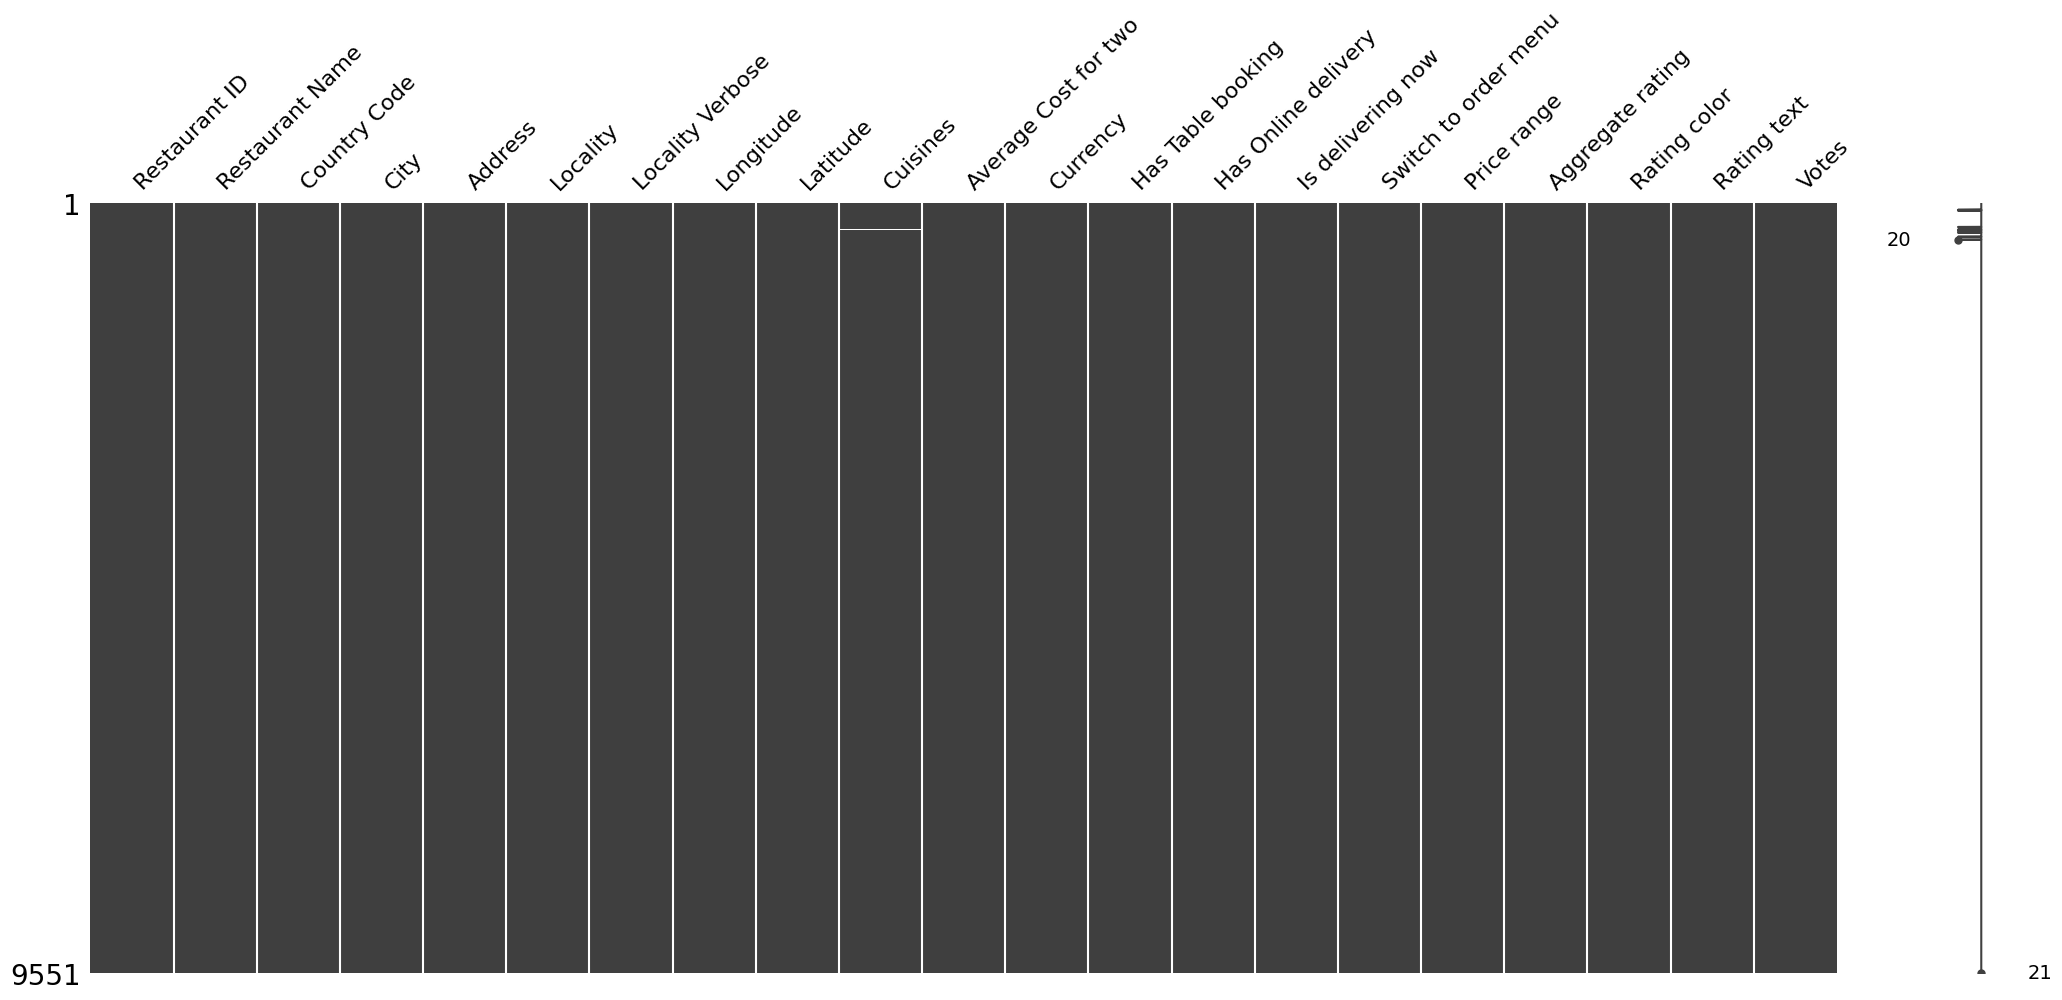

In [223]:
import missingno as msno
msno.matrix(df)
plt.show()


Deleting all the null values

In [224]:
df.shape

(9551, 21)

In [225]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [226]:
df = df.dropna()

In [227]:
df.shape

(9542, 21)

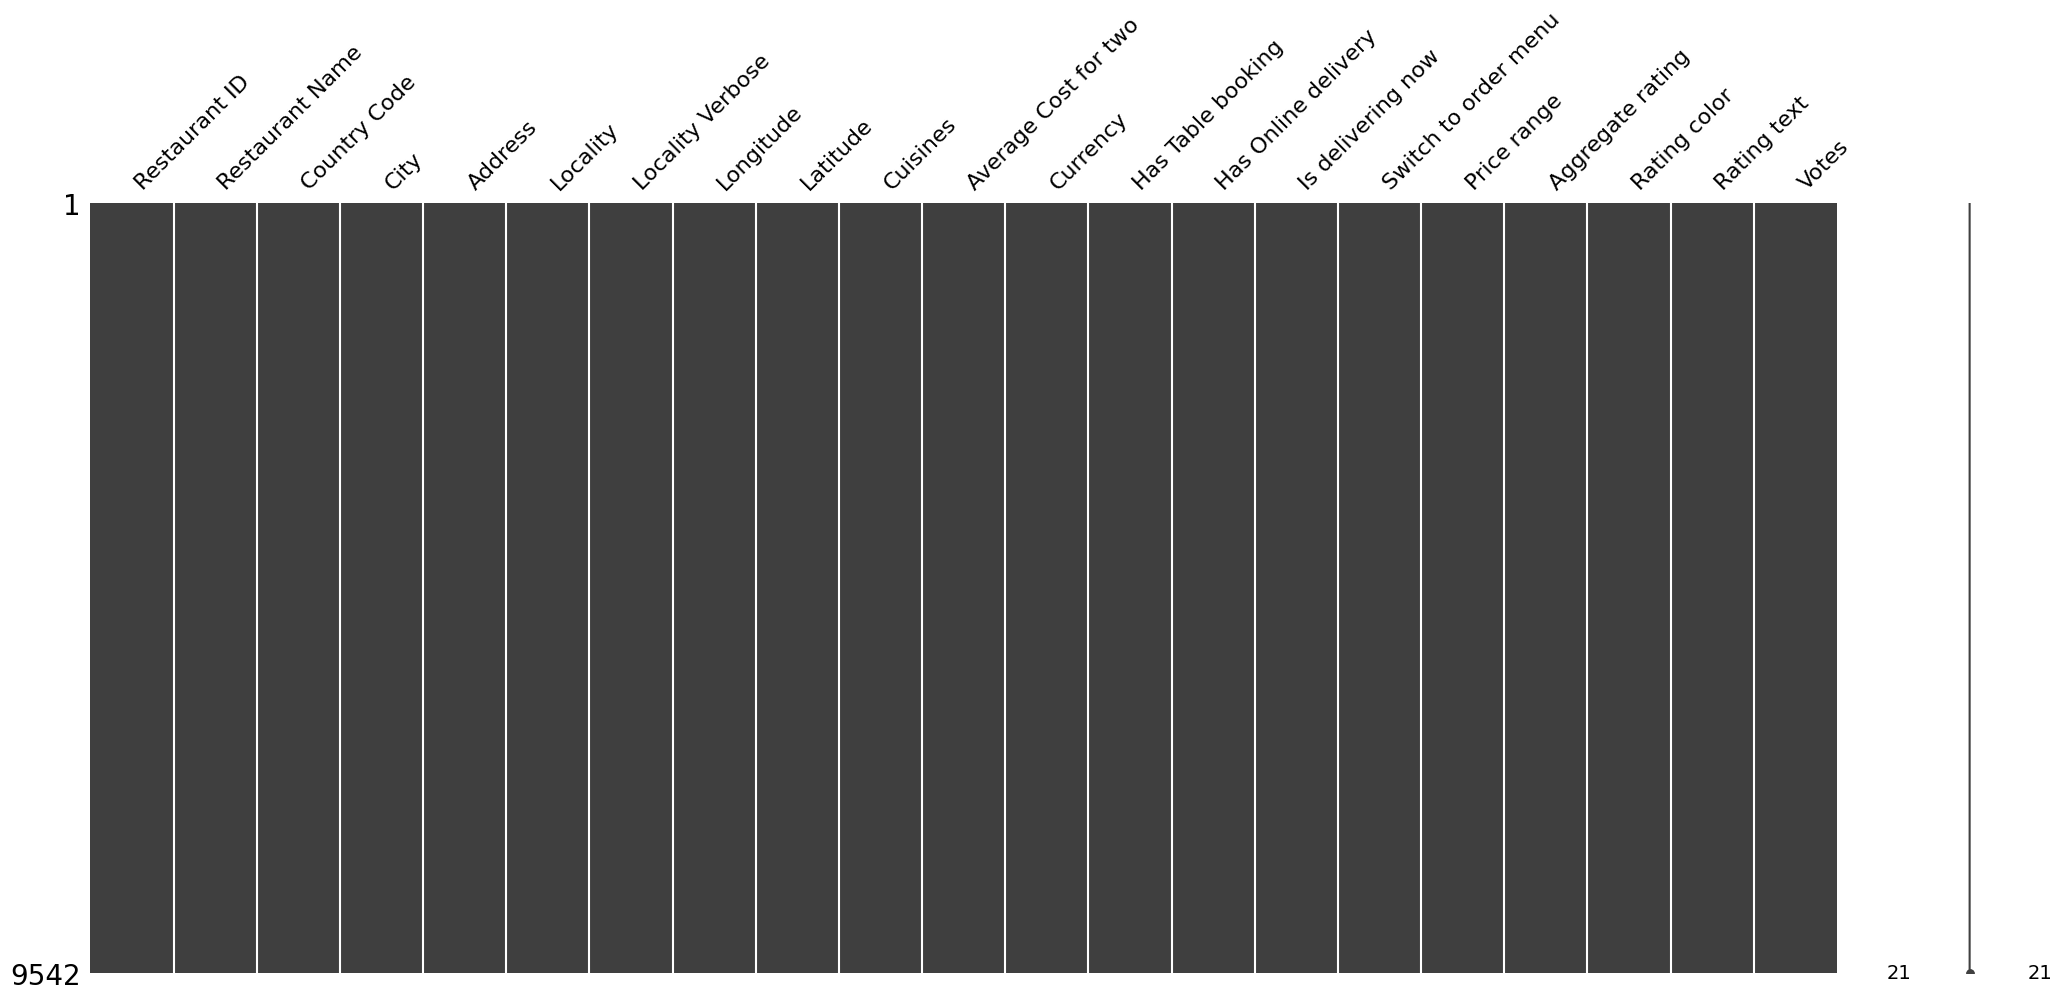

In [228]:
msno.matrix(df1)
plt.show()

In [229]:
df['Aggregate rating'].describe()

count    9542.000000
mean        2.665238
std         1.516588
min         0.000000
25%         2.500000
50%         3.200000
75%         3.700000
max         4.900000
Name: Aggregate rating, dtype: float64

In [230]:
df['Aggregate rating'].value_counts()

Aggregate rating
0.0    2148
3.2     522
3.1     519
3.4     495
3.3     483
3.5     480
3.0     468
3.6     458
3.7     427
3.8     399
2.9     381
3.9     332
2.8     315
4.1     274
4.0     266
2.7     250
4.2     221
2.6     191
4.3     174
4.4     143
2.5     110
4.5      95
2.4      87
4.6      78
4.9      61
2.3      47
4.7      41
2.2      27
4.8      25
2.1      15
2.0       7
1.9       2
1.8       1
Name: count, dtype: int64

In [231]:
import plotly.express as px
fig = px.pie(df,names ="Aggregate rating",hole = 0.3,template ="plotly_dark")
fig.show()

In [232]:
fig = px.scatter(df,x ="Average Cost for two",y="Price range",color= "Aggregate rating",template="plotly_dark")
fig.show()

In [233]:
fig = px.scatter(df,x ="Has Online delivery",y="Price range",color= "Aggregate rating",template="plotly_dark")
fig.show()

In [234]:
fig = px.scatter(df,x ="City",y="Cuisines",color= "Aggregate rating",template="plotly_dark")
fig.show()

In [235]:
from sklearn.preprocessing import LabelEncoder


#encoded_df = df.copy()

label_encoder = LabelEncoder()

columns_to_encode = ['Restaurant Name', 'City', 'Address', 'Locality', 'Locality Verbose', 'Cuisines', 'Currency', 'Rating color', 'Rating text']

# Encode categorical columns
for column in columns_to_encode:
    df[column] = label_encoder.fit_transform(df[column])

# Map 'Yes' and 'No' to numerical values for binary categorical columns
binary_columns = ['Has Table booking', 'Has Online delivery', 'Is delivering now', 'Switch to order menu']
binary_mapping = {'No': 0, 'Yes': 1}

# Encode binary categorical columns
for column in binary_columns:
    df[column] = df[column].map(binary_mapping)

# Print first few rows of encoded DataFrame
print(df.head())


   Restaurant ID  Restaurant Name  Country Code  City  Address  Locality  \
0        6317637             3742           162    73     8677       171   
1        6304287             3167           162    73     6047       592   
2        6300002             2892           162    75     4676       308   
3        6318506             4700           162    75     8682       860   
4        6314302             5515           162    75     8681       860   

   Locality Verbose   Longitude   Latitude  Cuisines  ...  Currency  \
0               172  121.027535  14.565443       920  ...         0   
1               600  121.014101  14.553708      1111  ...         0   
2               314  121.056831  14.581404      1671  ...         0   
3               873  121.056475  14.585318      1126  ...         0   
4               873  121.057508  14.584450      1122  ...         0   

   Has Table booking  Has Online delivery  Is delivering now  \
0                  1                    0           

In [236]:
# drop features that inhibit model building
df = df.drop('Restaurant ID', axis=1)
df = df.drop('Restaurant Name', axis=1)
df = df.drop('Country Code', axis=1)
df = df.drop('City', axis=1)
df = df.drop('Address', axis=1)
df = df.drop('Locality', axis=1)
df = df.drop('Locality Verbose', axis=1)
df = df.drop('Longitude', axis=1)
df = df.drop('Latitude', axis=1)
df = df.drop('Cuisines', axis=1)
df = df.drop('Currency', axis=1)

In [237]:
print(df.describe())

       Average Cost for two  Has Table booking  Has Online delivery  \
count           9542.000000        9542.000000          9542.000000   
mean            1200.326137           0.121358             0.256864   
std            16128.743876           0.326560             0.436927   
min                0.000000           0.000000             0.000000   
25%              250.000000           0.000000             0.000000   
50%              400.000000           0.000000             0.000000   
75%              700.000000           0.000000             1.000000   
max           800000.000000           1.000000             1.000000   

       Is delivering now  Switch to order menu  Price range  Aggregate rating  \
count        9542.000000                9542.0  9542.000000       9542.000000   
mean            0.003563                   0.0     1.804968          2.665238   
std             0.059589                   0.0     0.905563          1.516588   
min             0.000000            

In [238]:
df

,Average Cost for two,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,1100,1,0,0,0,3,4.8,0,1,314
1,1200,1,0,0,0,3,4.5,0,1,591
2,4000,1,0,0,0,4,4.4,1,5,270
3,1500,0,0,0,0,4,4.9,0,1,365
4,1500,1,0,0,0,4,4.8,0,1,229
...,...,...,...,...,...,...,...,...,...,...
9546,80,0,0,0,0,3,4.1,1,5,788
9547,105,0,0,0,0,3,4.2,1,5,1034
9548,170,0,0,0,0,4,3.7,5,2,661
9549,120,0,0,0,0,4,4.0,1,5,901


<ipython-input-239-00528cf33232>:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='Aggregate rating', ylabel='Density'>

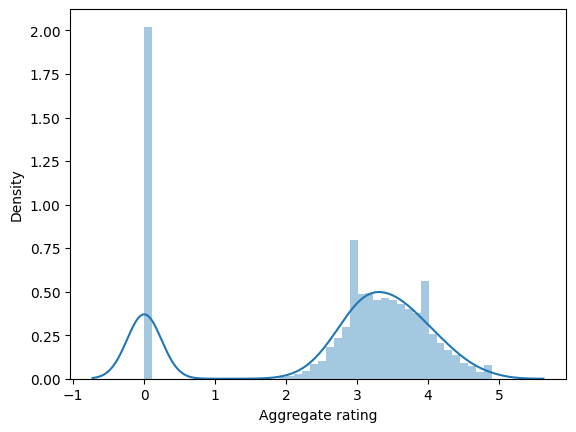

In [239]:
sns.distplot(df['Aggregate rating'])

<Axes: xlabel='Aggregate rating', ylabel='Votes'>

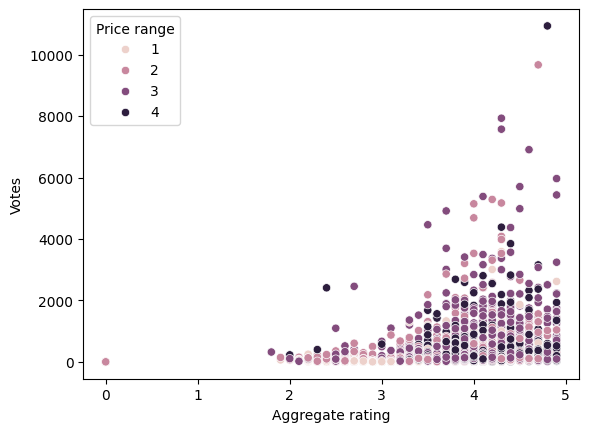

In [240]:
sns.scatterplot(x=df["Aggregate rating"],y=df["Votes"],hue=df["Price range"])

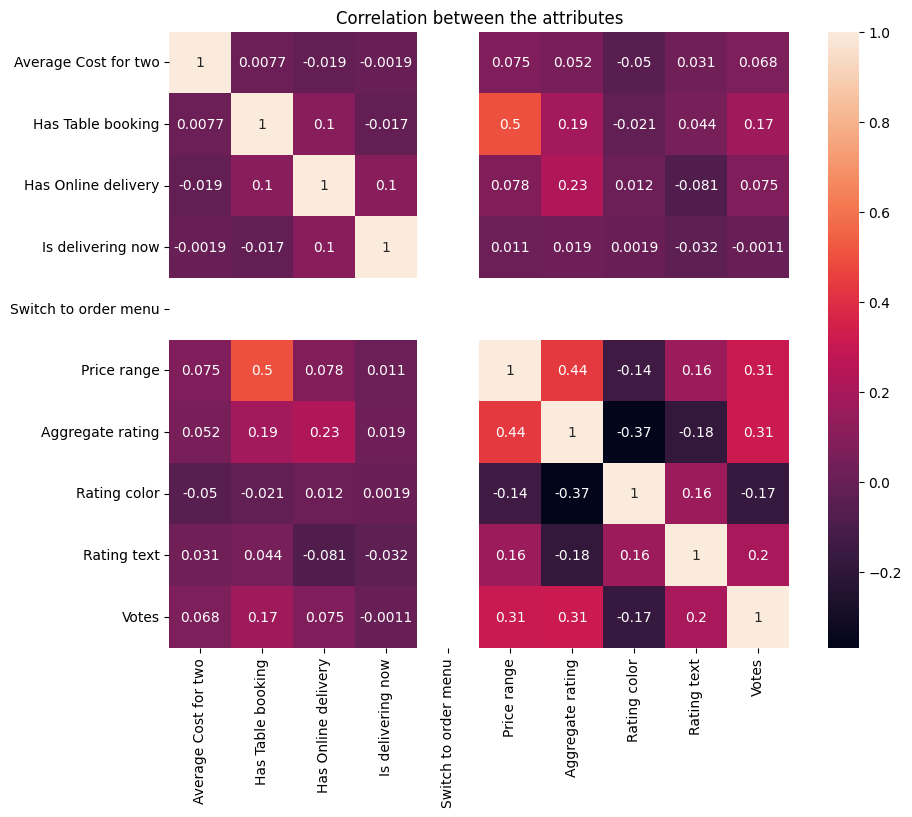

In [241]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)
plt.title("Correlation between the attributes")
plt.show()

In [242]:
x = df.drop('Aggregate rating', axis=1)
y = df['Aggregate rating']

**Data splitting**

In [243]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=250)
x_train.head()
y_train.head()

9453    3.8
3230    3.9
6529    4.2
2576    2.8
1907    3.0
Name: Aggregate rating, dtype: float64

In [244]:
print("x_train: ", x_train.shape)
print("x_test: ",x_test.shape)
print("y_train: ",y_train.shape)
print("y_test: ",y_test.shape)

x_train:  (8587, 9)
x_test:  (955, 9)
y_train:  (8587,)
y_test:  (955,)


**Linear Regression Model**

In [245]:
#training by linear regression algorithm
linreg = LinearRegression()
linreg.fit(x_train,y_train)
linreg_pred=linreg.predict(x_test)

In [246]:
#evaluating performance metrics of linear regression
linreg_mae = mean_absolute_error(y_test, linreg_pred)
linreg_mse = mean_squared_error(y_test, linreg_pred)
linreg_r2 = r2_score(y_test, linreg_pred)
print(f"Mean Absolute Error of the linear regression model is: {linreg_mae:.2f}")
print(f"Mean Squared Error of the linear regression model is: {linreg_mse:.2f}")
print(f"R2 score of the linear regression model is: {linreg_r2:.2f}")

Mean Absolute Error of the linear regression model is: 0.99
Mean Squared Error of the linear regression model is: 1.43
R2 score of the linear regression model is: 0.38


**Decision Tree**

In [247]:
# training by decision tree regressor algorithm
dtree = DecisionTreeRegressor()
dtree.fit(x_train, y_train)
dtree_pred = dtree.predict(x_test)

In [248]:
#evaluating performance metrics of decision tree
dtree_mae = mean_absolute_error(y_test, dtree_pred)
dtree_mse = mean_squared_error(y_test, dtree_pred)
dtree_r2 = r2_score(y_test, dtree_pred)
print(f"Mean Absolute Error of the decision tree model is: {dtree_mae:.2f}")
print(f"Mean Squared Error of the decision tree model is: {dtree_mse:.2f}")
print(f"R2 score of the decision tree model is: {dtree_r2:.2f}")


Mean Absolute Error of the decision tree model is: 0.14
Mean Squared Error of the decision tree model is: 0.05
R2 score of the decision tree model is: 0.98


**Model have 98% accuracy**

MSE of 0.05 indicates that model's predictions are very accurate & low errors.

R2 value of 0.98 suggests that model is highly effective at explaining & predicting the target variable.

Decision Tree Regressor model is performing exceptionally well on the test data.

**Analysing the factors affecting restaurant ratings**

Distribution of the target variable ("Aggregate rating") is well balanced.

Expensive restaurants (higher price range) tend to have higher ratings.